# CSCI-UA 0473 - Introduction to Machine Learning
## Wednesday, February 8, 2017

## Autograd
Autograd is a package developed in Python and can compute derivatives of scalar-valued functions. It can also be used to take derivatives recursively. 

To install this package, just type $\textbf{pip install autograd}$ in your terminal.

In [1]:
import autograd.numpy as np
from autograd import grad

## 1. Square function

In [2]:
def square(x):
    return x * x

In [3]:
d_square = grad(square)
d_square(2.)

4.0

## 2. Nested Functions

In [4]:
## We essentially have the following tranformations: x -> x^2 -> 2 * x^2 * x^2 = 2 * x^4

def nested_function(x):
    y = x * x
    z = 2 * y * y
    
    return z

In [5]:
d_nested_function = grad(nested_function)
d_nested_function(-2.)

-64.0

## NOTE
Notice that the argument with respect to which we want to compute the derivative is the first argument to the grad() function by default.

## 3. Multiple Arguments

In [6]:
## We essentially have the following tranformations: x, y -> x + y -> x * (x + y) = x^2 + x * y

def multiple_arguments(x, y):
    a = x + y
    b = x * a
    
    return b

In [7]:
d_multiple_arguments = grad(multiple_arguments)     # Derivative: 2 * x + y
d_multiple_arguments(2., 1.)

5.0

In [9]:
d_multiple_arguments = grad(multiple_arguments, argnum=1)   # Derivative: x
d_multiple_arguments(2., 1.)

2.0

## 4. Derivative of Derivative

In [12]:
# First derivative
d_multiple_arguments = grad(multiple_arguments)    # 1st Derivative: 2 * x + y

# SECOND DERIVATIVE
d2_multiple_arguments = grad(d_multiple_arguments) # 2nd Derivative: 2

In [13]:
d2_multiple_arguments(9., 10.)

2.0

In [14]:
d3_multiple_arguments = grad(d2_multiple_arguments) # 3rd Derivative: 0

In [15]:
d3_multiple_arguments(-1., 3.)

/Users/rossfreeman/anaconda2/lib/python2.7/site-packages/autograd/core.py:37: UserWarning: Output seems independent of input. Returning zero gradient.
  warnings.warn("Output seems independent of input. Returning zero gradient.")


0.0

## 5. Huge Functions :O

In [16]:
def sigmoid(a):
    return 1. / (1. + np.exp(-a))

In [17]:
def sig_of_sig_of_sig(x):
    return sigmoid(sigmoid(sigmoid(x)))

In [18]:
d_rec_sig = grad(sig_of_sig_of_sig)

In [19]:
d_rec_sig(1.5)

0.0070407538644964105

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
x = np.linspace(-7., 7., 200)

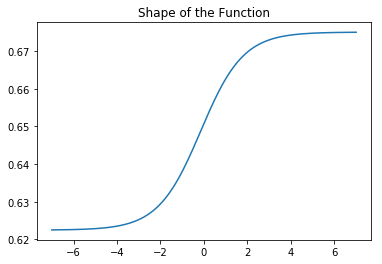

In [22]:
plt.plot(x, sig_of_sig_of_sig(x))
plt.title("Shape of the Function")

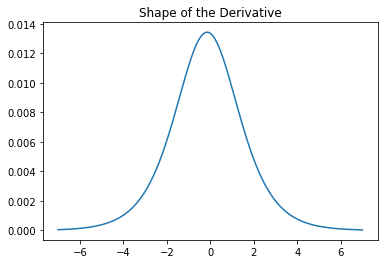

In [23]:
plt.plot(x, [d_rec_sig(i) for i in x])
plt.title('Shape of the Derivative')

## More Information
If you are curious to learn more about the package and it's working, you can visit https://github.com/HIPS/autograd/blob/master/docs/tutorial.md for more information!